In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/capital-bikesharecsv/2015 Q1.csv")
df.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type
0,2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual
1,2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual
2,468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered
3,348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered
4,980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual


In [2]:
import pandas as pd

rides = pd.read_csv("/kaggle/input/capital-bikesharecsv/2015 Q1.csv")

rides['Start date'] = pd.to_datetime(rides['Start date'])
rides.head(-20)

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type
0,2394764,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual
1,2389161,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual
2,468047,2015-01-01 00:04:00,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered
3,348068,2015-01-01 00:07:00,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered
4,980844,2015-01-01 00:09:00,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual
...,...,...,...,...,...,...,...
431440,130463,2015-03-31 23:29:00,Columbus Circle / Union Station,3/31/2015 23:31,3rd & H St NE,W00736,Registered
431441,483348,2015-03-31 23:30:00,Columbus Circle / Union Station,3/31/2015 23:38,15th & F St NE,W01065,Registered
431442,768075,2015-03-31 23:30:00,7th & F St NW / National Portrait Gallery,3/31/2015 23:43,15th & F St NE,W00621,Registered
431443,452934,2015-03-31 23:30:00,Columbus Circle / Union Station,3/31/2015 23:38,13th & D St NE,W00078,Registered


# Loading a csv file in Pandas
The capital_onebike.csv file covers the October, November and December rides of the Capital Bikeshare bike W20529.

* Import Pandas.
* Complete the call to read_csv() so that it correctly parses the date columns Start date and End date.

In [3]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('/kaggle/input/capital-bikesharecsv/2015 Q1.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Total duration (ms)                             2394764
Start date                          2015-01-01 00:02:00
Start station          Constitution Ave & 2nd St NW/DOL
End date                            2015-01-01 00:42:00
End station                              15th & K St NW
Bike number                                      W00612
Subscription Type                                Casual
Name: 0, dtype: object


# Making timedelta columns
Earlier in this course, you wrote a loop to subtract datetime objects and determine how long our sample bike had been out of the docks. Now you'll do the same thing with Pandas.


* Subtract the Start date column from the End date column to get a Series of timedeltas; assign the result to ride_durations.
* Convert ride_durations into seconds and assign the result to the 'Duration' column of rides.

In [4]:
# Subtract the start date from the end date
ride_durations =rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0    2400.0
1    2400.0
2     480.0
3     360.0
4     960.0
Name: Duration, dtype: float64


Great! Because Pandas supports method chaining, you could also perform this operation in one line: rides['Duration'] = (rides['End date'] - rides['Start date']).dt.total_seconds()

# How many joyrides?
Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.


* Create a Pandas Series which is True when Start station and End station are the same, and assign the result to joyrides.
* Calculate the median duration of all rides.
* Calculate the median duration of joyrides.

In [5]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

17284 rides were joyrides
The median duration overall was 540.00 seconds
The median duration for joyrides was 120.00 seconds


# It's getting cold outside, W20529
Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?


* Resample rides to the daily level, based on the Start date column.
* Plot the .size() of each result.
* Since the daily time series is so noisy for this one bike, change the resampling to be monthly.

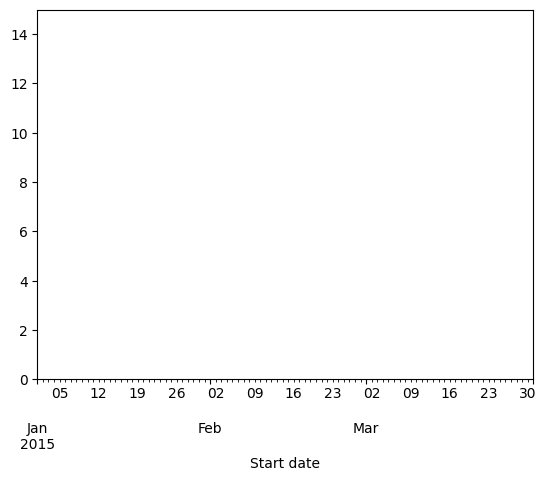

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Start date is datetime
rides['Start date'] = pd.to_datetime(rides['Start date'])

# Resample rides to daily, take the size, plot the results
rides.resample('D', on='Start date')\
     .size()\
     .plot(ylim=[0, 15])

# Show the results
plt.show()


/tmp/ipykernel_81/605545311.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rides.resample('M', on = 'Start date')\


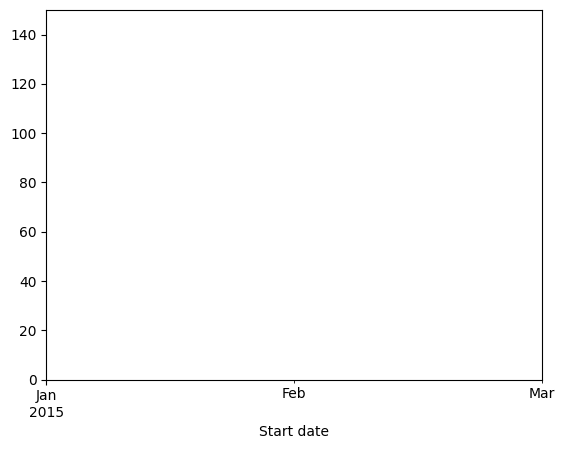

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

# Members vs casual riders over time
Riders can either be "Members", meaning they pay yearly for the ability to take a bike at any time, or "Casual", meaning they pay at the kiosk attached to the bike dock.

Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?

As before, rides has been loaded for you. You're going to use the Pandas method .value_counts(), which returns the number of instances of each value in a Series. In this case, the counts of "Member" or "Casual".


* Set monthly_rides to be a resampled version of rides, by month, based on start date.
* Use the method .value_counts() to find out how many Member and Casual rides there were, and divide them by the total number of rides per month.

In [ ]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on = "Start date")['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

# Combining groupby() and resample()
A very powerful method in Pandas is .groupby(). Whereas .resample() groups rows by some time or date information, .groupby() groups rows based on the values in one or more columns. For example, rides.groupby('Member type').size() would tell us how many rides there were by member type in our entire DataFrame.

.resample() can be called after .groupby(). For example, how long was the median ride by month, and by Membership type?


* Complete the .groupby() call to group by 'Member type', and the .resample() call to resample according to 'Start date', by month.
* Print the median Duration for each group.

In [ ]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = "Start date")

# Print the median duration for each group
print(grouped['Duration'].median())

Nice! It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. Keep in mind that you can also group by more than one column at once.

# Timezones in Pandas
Earlier in this course, you assigned a timezone to each datetime in a list. Now with Pandas you can do that with a single method call.

(Note that, just as before, your data set actually includes some ambiguous datetimes on account of daylight saving; for now, we'll tell Pandas to not even try on those ones. Figuring them out would require more work.)


* Make the Start date column timezone aware by localizing it to 'America/New_York' while ignoring any ambiguous datetimes.
* Now switch the Start date column to the timezone 'Europe/London' using the .dt.tz_convert() method.

In [9]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2015-01-01 00:02:00-05:00
2015-01-01 05:02:00+00:00


dt.tz_convert() converts to a new timezone, whereas dt.tz_localize() sets a timezone in the first place. You now know how to deal with datetimes in Pandas.

# How long per weekday?
Pandas has a number of datetime-related attributes within the .dt accessor. Many of them are ones you've encountered before, like .dt.month. Others are convenient and save time compared to standard Python, like .dt.day_name().


* Add a new column to rides called 'Ride start weekday', which is the weekday of the Start date.
* Print the median ride duration for each weekday.




In [10]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       540.0
Monday       540.0
Saturday     540.0
Sunday       600.0
Thursday     540.0
Tuesday      540.0
Wednesday    540.0
Name: Duration, dtype: float64


There are .dt attributes for all of the common things you might want to pull out of a datetime, such as the day, month, year, hour, and so on, and also some additional convenience ones, such as quarter and week of the year out of 52.

# How long between rides?
For your final exercise, let's take advantage of Pandas indexing to do something interesting. How much time elapsed between rides?


* Calculate the difference in the Start date of the current row and the End date of the previous row and assign it to rides['Time since'].
* Convert rides['Time since'] to seconds to make it easier to work with.
* Resample rides to be in monthly buckets according to the Start date.
* Divide the average by (60*60) to get the number of hours on average that W20529 waited in the dock before being picked up again.




In [12]:
import pandas as pd

# Ensure datetimes are consistent (remove timezone info here)
rides['Start date'] = pd.to_datetime(rides['Start date']).dt.tz_localize(None)
rides['End date']   = pd.to_datetime(rides['End date']).dt.tz_localize(None)

# Shift the index of the end date up one; now subtract it from the start date
rides['Time since'] = rides['Start date'] - rides['End date'].shift(1)

# Move from a timedelta to a number of seconds
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on="Start date")

# Print the average hours between rides each month
print(monthly['Time since'].mean() / (60*60))


/tmp/ipykernel_81/3432373137.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = rides.resample('M', on="Start date")


Start date
2015-01-31    4.797658
2015-02-28    4.806816
2015-03-31    3.961225
2015-04-30    4.832237
Freq: ME, Name: Time since, dtype: float64
